In [3]:
import numpy as np
import mdtraj as md
from docking_tools import trajectory_analysis 
from docking_tools import plotting
import glob
import matplotlib.pyplot as plt

In [4]:
import glob
import mdtraj as md


<mdtraj.Trajectory with 19629 frames, 331 atoms, 21 residues, without unitcells>


In [16]:
def make_whole_trajs(ligand='fasudil'):
    protein_fasudil_complexes = glob.glob("/home/zzhang/localhome1/DiffDock/DiffDock_copy/results/" + ligand + "/protein_ligand_complex/*.pdb")
    trajs = [md.load(p) for p in protein_fasudil_complexes]
    whole_traj = trajs[0]
    for t in trajs[1:]:
        whole_traj = whole_traj.join(t)
    return whole_traj

In [17]:
def calculate_parameters(ligand='fasudil'):
    clus_idx = np.insert(np.cumsum(np.loadtxt('/home/zzhang/localhome1/DiffDock/DiffDock_copy/data/anjali/' + ligand + '/DiffDock_holo_clus_count.txt')), 0, 0)
    trajs = [whole_traj[int(clus_idx[i]):int(clus_idx[i+1])] for i in range(len(clus_idx)-1)]
    n_frames = trajs[0].n_frames
    n_res = trajs[0].atom_slice(trajs[0].top.select('protein')).n_residues
    ligand_idx = n_res
    n_clus = len(clus_idx)-1
    return ligand_idx
    

In [ ]:
def calculate_contacts(whole_traj, ligand_idx):
    contacts = {}
    
    contacts['hphob'] = trajectory_analysis.hphob_contacts(whole_traj, ligand_idx)
    
    contacts['aro'] = trajectory_analysis.aro_contacts(
        whole_traj,
        ligand_rings=[[296, 310, 306, 307, 308, 309], [303, 304, 305, 306, 307, 302]]
    )
    
    contacts['hbond'] = trajectory_analysis.hbond(
        whole_traj,
        ligand_idx,
        lig_hbond_donors=[[294, 314]]
    )
    
    contacts['charge'] = trajectory_analysis.charge_contacts(
        whole_traj,
        Ligand_Pos_Charges=[294]
    )
    
    contacts['dual'] = trajectory_analysis.dual_contact(
        whole_traj,
        residue_idx=ligand_idx
    )
    return contacts

In [18]:
def calculate_contacts(whole_traj, ligand_idx, ligand_rings=[[296, 310, 306, 307, 308, 309], [303, 304, 305, 306, 307, 302]], lig_hbond_donors=[[294, 314]], Ligand_Pos_Charges=[294]):
    contacts = {}
    
    contacts['hphob'] = trajectory_analysis.hphob_contacts(whole_traj, ligand_idx)
    
    contacts['aro'] = trajectory_analysis.aro_contacts(
        whole_traj,
        ligand_rings
    )
    
    contacts['hbond'] = trajectory_analysis.hbond(
        whole_traj,
        ligand_idx,
        
    )
    
    contacts['charge'] = trajectory_analysis.charge_contacts(
        whole_traj,
        Ligand_Pos_Charges
    )
    
    contacts['dual'] = trajectory_analysis.dual_contact(
        whole_traj,
        residue_idx=ligand_idx
    )
    return contacts

In [13]:
def plot_four_interactions(contacts, whole_traj):
        
    avg_hphob  = contacts['hphob'].mean(axis=0)
    avg_aro    = contacts['aro'].mean(axis=0)
    avg_hbond  = contacts['hbond'].mean(axis=0)
    avg_charge = contacts['charge'].mean(axis=0)
    
    top = whole_traj.topology
    residues = list(top.residues)[:len(avg_hphob)]
    residue_labels = [f"{res.name}{res.index}" for res in residues]
    
    
    plt.figure(figsize=(10,4))
    
    plt.plot(avg_hphob,  label='Hydrophobic', color='green')
    plt.plot(avg_aro,    label='Aromatic', color='black')
    plt.plot(avg_hbond,  label='H-bond', color='blue')
    plt.plot(avg_charge, label='Charge-Charge',color='red')
    
    plt.xticks(np.arange(len(avg_hphob)), residue_labels, rotation=70)
    plt.ylabel("Contact Probability")
    plt.xlabel("Residue")
    plt.title("Protein–Ligand Interaction (Avg per Residue) - Fasudil")
    plt.legend()
    plt.tight_layout()
    plt.show()
    return
    

In [19]:
def plot_dual_with_writhe_tools(ligand):
    whole_traj = make_whole_trajs(ligand)
    
    from writhe_tools.md_tools import ResidueDistances, get_residues, to_contacts
    from writhe_tools.plots import plot_distance_matrix
    
    sequence, ca_index = get_residues(whole_traj)
    ligand_distances = ResidueDistances(ca_index, whole_traj, np.array([20]))
    residue_distances = ResidueDistances(ca_index, whole_traj)
    residue_distances.plot(index=None, contact_cutoff=1, contacts=True)
    
    ligand_contacts = ligand_distances.contacts(0.6)
    dual = (ligand_contacts.T @ ligand_contacts) / len(ligand_contacts)
    plot_distance_matrix(dual)
    return

In [21]:
def plot_four_ligand_interactions(ligand='fasudil', ligand_rings=[[296, 310, 306, 307, 308, 309], [303, 304, 305, 306, 307, 302]], lig_hbond_donors=[[294, 314]], Ligand_Pos_Charges=[294]):
    whole_traj = make_whole_trajs(ligand)
    ligand_idxs = calculate_parameters(ligand)
    contacts = calculate_contacts(whole_traj, ligand_idx, ligand_rings, lig_hbond_donors, Ligand_Pos_Charges)
    plot_four_interactions(contacts, whole_traj)
    return

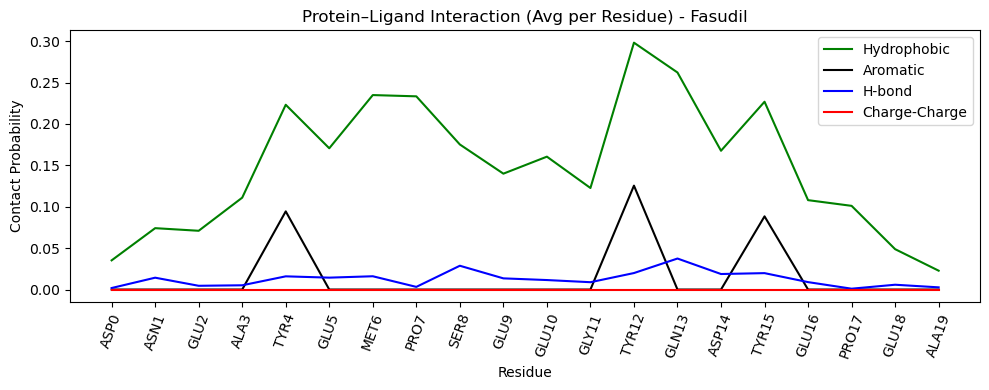

In [23]:
plot_four_ligand_interactions(ligand='fasudil', ligand_rings=[[296, 310, 306, 307, 308, 309], [303, 304, 305, 306, 307, 302]], lig_hbond_donors=[[294, 314]], Ligand_Pos_Charges=[294])

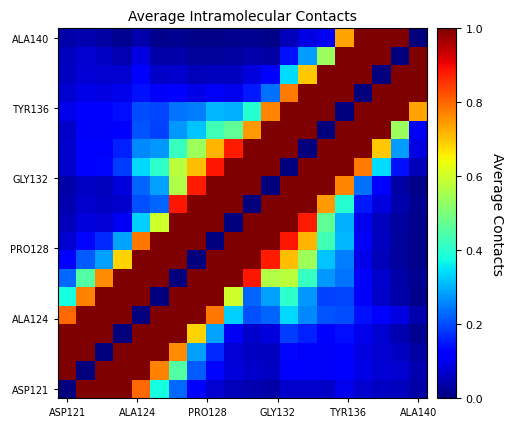

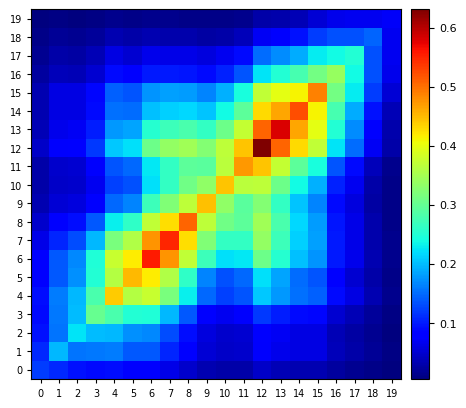

In [20]:
plot_dual_with_writhe_tools('fasudil')

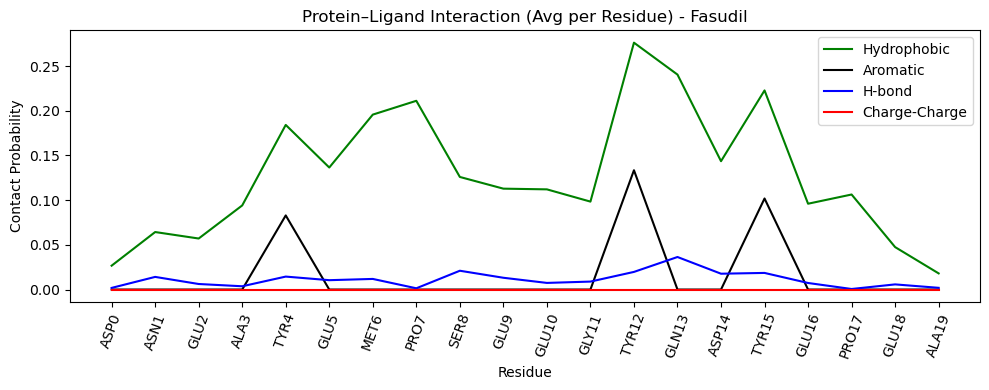

In [24]:
plot_four_ligand_interactions(ligand='ligand23', ligand_rings=[[294, 300, 301, 302, 298, 299], [296, 304, 303, 302, 298, 297]], lig_hbond_donors=[[312, 329]], Ligand_Pos_Charges=[])

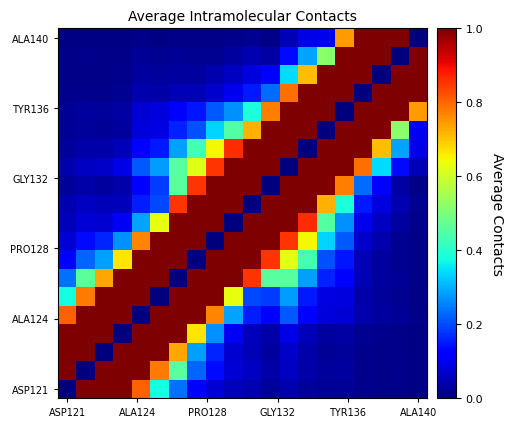

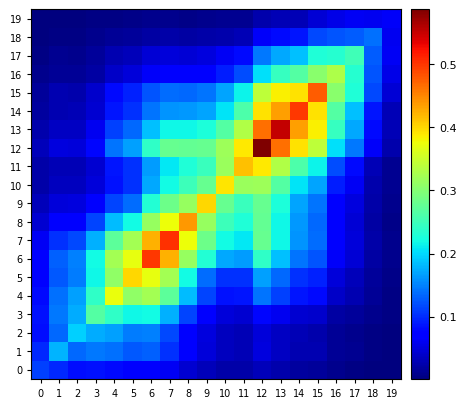

In [25]:
plot_dual_with_writhe_tools('ligand23')

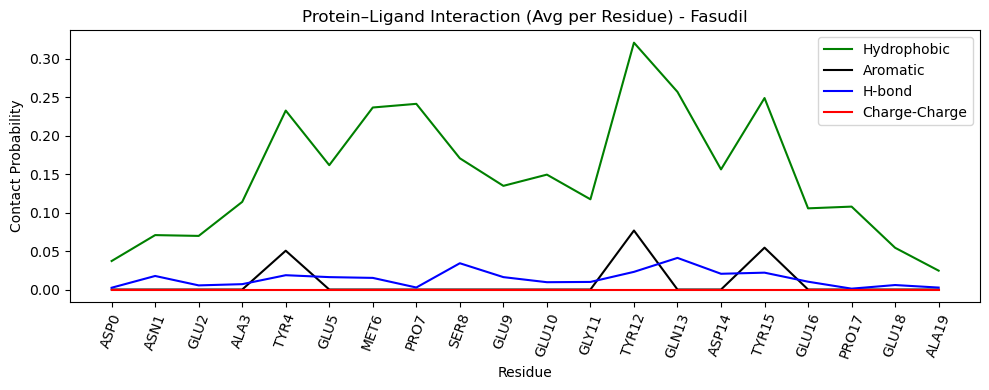

In [26]:
plot_four_ligand_interactions(ligand='ligand47', ligand_rings=[[303, 304, 305, 306, 301, 302]], lig_hbond_donors=[[296, 316]], Ligand_Pos_Charges=[296])

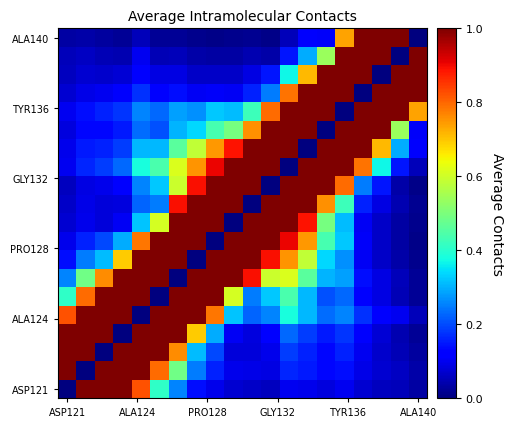

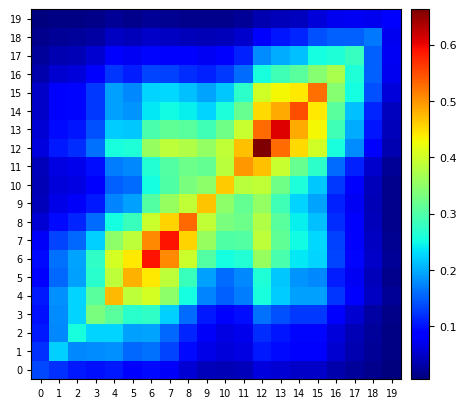

In [27]:
plot_dual_with_writhe_tools('ligand47')

/home/zzhang/anaconda3/envs/diffdock/lib/python3.9/site-packages/torch/__config__.py:9: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._show_config()


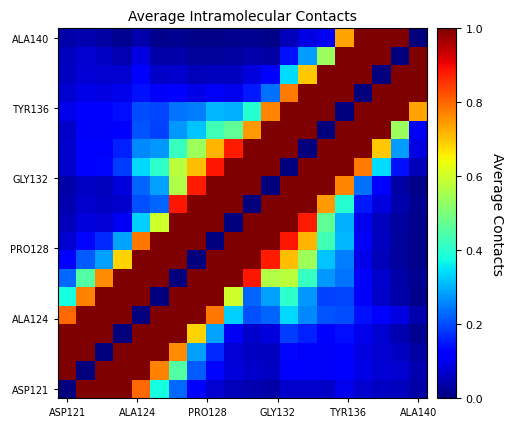

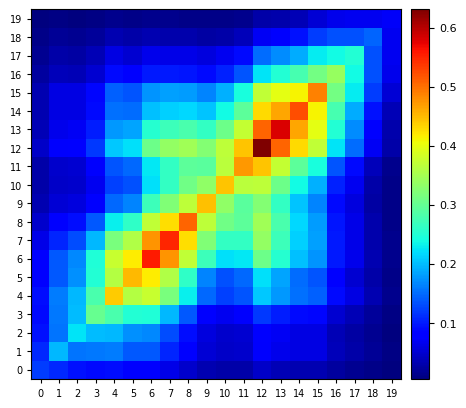

In [9]:
from writhe_tools.md_tools import ResidueDistances, get_residues, to_contacts
from writhe_tools.plots import plot_distance_matrix

sequence, ca_index = get_residues(whole_traj)
ligand_distances = ResidueDistances(ca_index, whole_traj, np.array([20]))
residue_distances = ResidueDistances(ca_index, whole_traj)
residue_distances.plot(index=None, contact_cutoff=1, contacts=True)

ligand_contacts = ligand_distances.contacts(0.6)
dual = (ligand_contacts.T @ ligand_contacts) / len(ligand_contacts)
plot_distance_matrix(dual)